### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :
<img src="RSquared.PNG" width="300">
                                              
Where RSS:  is  the Residual Sum of squares and is given as :
<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :
<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.
    <img src="TSS2.PNG">
    
The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:
 
<img src="adjr.PNG" width="300">
We can see that R2 always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
Mathematically, it is calculated as:
                                        <img src="adjr2.PNG">
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2.
Thus, adjusted R2  will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.


## Business Case:-Prediciting the chances of admission with given features

In [16]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
## Importing data
data=pd.read_csv('Admission_Prediction.csv')

In [18]:
## Getting the some rows of data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


## Basic understanding of features-- Domain Analysis
GRE Score:-The graduate record examination (GRE) is a standardized exam used to measure one's aptitude for abstract thinking in the areas of analytical writing, mathematics, and vocabulary. The GRE is commonly used by many graduate schools in the U.S. and Canada to determine an applicant's eligibility for the program.

TOEFL Score:-TOFEL Score is a standardized test to measure the English language ability of non-native speakers wishing to enroll in English-speaking universities.

University Rating:-Rating of university

SOP:-Statement of Purpose, a reflection of your personality that you portray in front of the admission committee (Adcom) for getting enrolled in universities abroad.


LOR:-Letter of Recommendation.The LOR is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.

CGPA:-CGPA stands for Cumulative Grade Points Average. CGPA is nothing but the average of grade points obtained by students in all the subjects excluding the 6th subject.

Research:-Whether the student has done the research or not

Chance of Admit:-Target variable and we need to claculate percentage of getting admission.

## Basic Checks

In [ ]:
data.head()

In [ ]:
data.tail()

In [4]:
data.describe()
## There seems to be missing values in GRE,TOFEL,UR features.
## Serial No is unique identity of the dataset.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


## Exploratory Data Analysis

### Univariate Analysis-- Analyzing single variable 

In [20]:
## Renaming certain columns just to make analysis easy
data.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score',
                     'University Rating':'University_Rating',
                     'Chance of Admit':'Chance_of_Admit'}
            ,inplace=True)

In [21]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


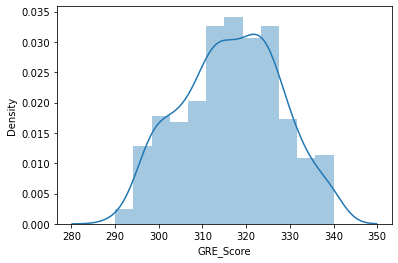

In [8]:
## ANalyszing GRE Score

sns.distplot(data.GRE_Score.dropna(axis=0))
## normal distribution
## values lying between 310-330
plt.show()

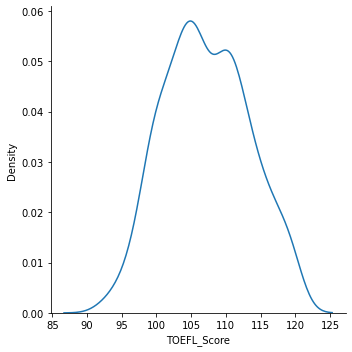

In [10]:
## ANalsyzing TOEFL_Score
sns.displot(data.TOEFL_Score.dropna(axis=0),kind='kde')
plt.show()
## Normally distributed.

In [ ]:
data.head()

In [10]:
## Analaysizng University_Rating
##sns.distplot(data.University_Rating.dropna(axis=0))
#3sns.countplot(x='University_Rating',data=data)
data.University_Rating.value_counts()
## Most of the university has rating of 3.
## 72 unversities seems to be good one.
## 32 universities are worst performing.

3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: University_Rating, dtype: int64

<AxesSubplot:xlabel='SOP', ylabel='count'>

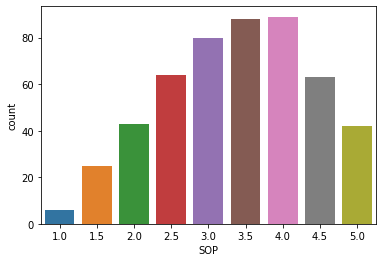

In [11]:
## Analayzing SOP
##data.SOP.value_counts()
## There are very less students who are able to impress the 
##admission committee 
sns.countplot(x='SOP',data=data)

In [ ]:
## Analysizng LOR
##data.LOR.value_counts()
## Average candidates have applied for admission.
sns.countplot(x='LOR',data=data)

In [ ]:
## Analyzing CGPA
sns.distplot(data.CGPA)
## Most of students have CGPA in range of 8 to 9.

In [ ]:
## Analyzing  Research
sns.countplot(x='Research',data=data)
## The distribution seems to be balanced however the 
##students done research are more.

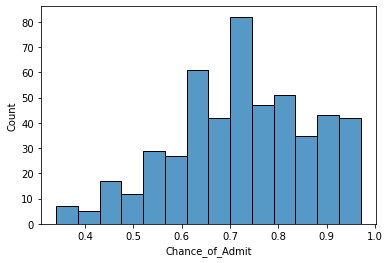

In [11]:
## Analysis target variable
sns.histplot(x='Chance_of_Admit',data=data)
plt.show()
most of the students have chance of admit is between 0.6 to 0.8
high chance  to get admit have only 30 to 40 students

### Bivariate Analysis-->Analyzing 2 variables at a time.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance_of_Admit', ylabel='Density'>

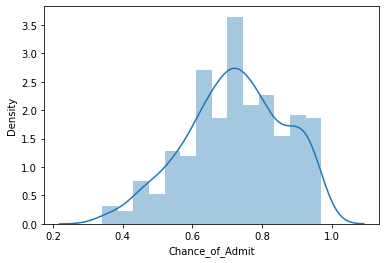

In [12]:
## Analsyzing target variable
sns.distplot(data.Chance_of_Admit)

In [22]:
data1=data[['GRE_Score', 'TOEFL_Score', 'University_Rating', 
            'SOP','LOR', 'CGPA', 'Research']]

In [23]:
data1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,NaN,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


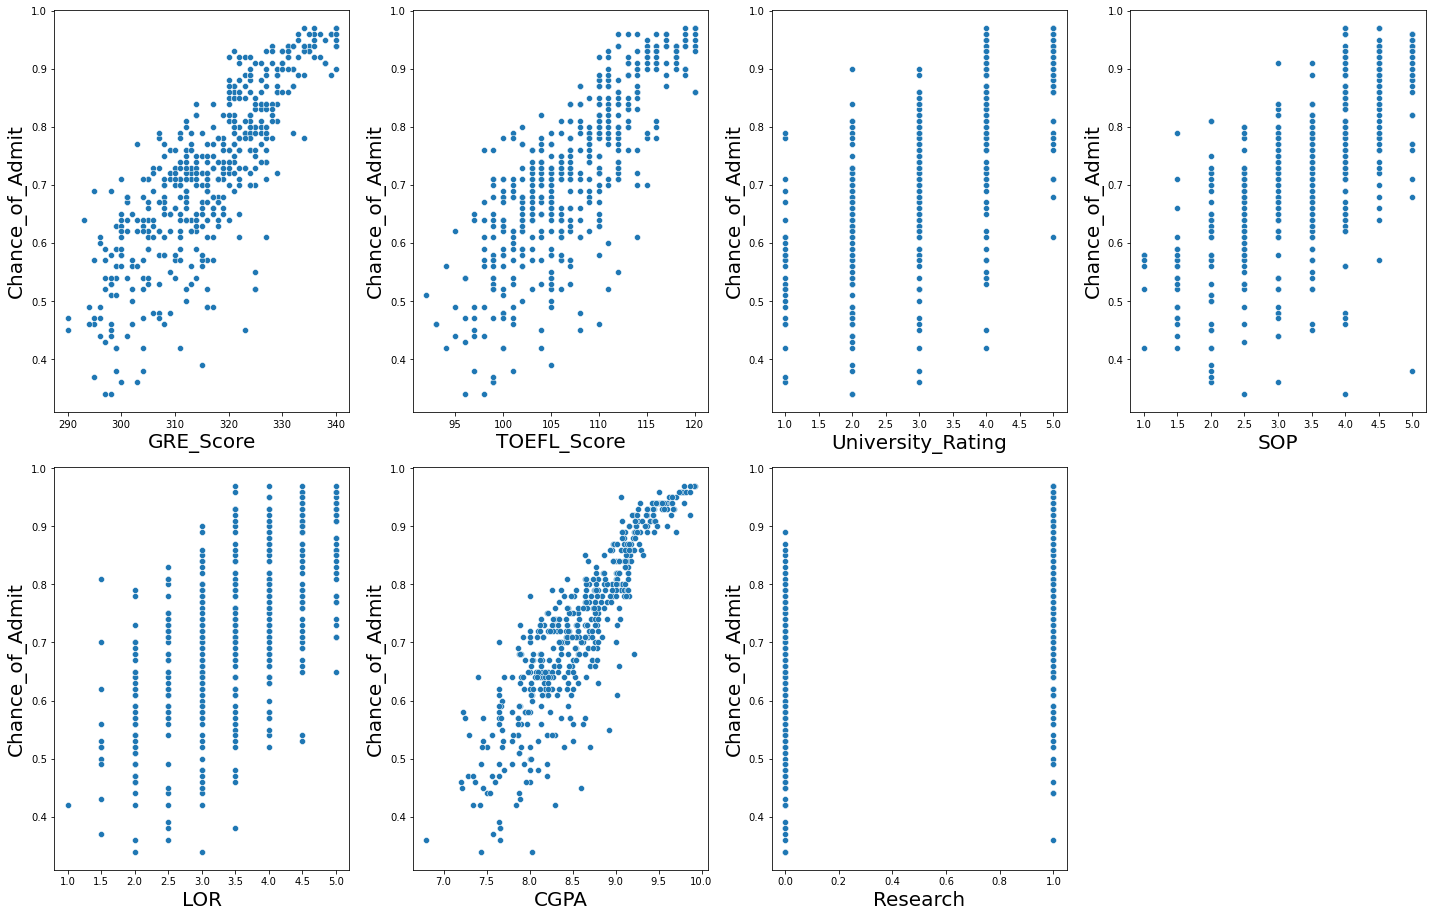

In [24]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.Chance_of_Admit)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance_of_Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

## Bivariate and Multivariate Analysis

## Data Preprocessing

In [25]:
## Checking missing values
data.isnull().sum()

Serial No.            0
GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

In [ ]:
## Imputing the missing values 
## Since GRE score,TOEFL score has shown normal distribution so mean can be better substitute to impute missing values.
## University rating is ordinal data so mode imputation can be used.

In [26]:
## Getting the rows where values got missed
data.loc[data['GRE_Score'].isnull()==True]

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
12,13,NaN,112.0,4.0,4.0,4.5,9.10,1,0.78
23,24,NaN,119.0,5.0,5.0,4.5,9.70,1,0.95
36,37,NaN,106.0,2.0,4.0,4.0,8.40,0,0.64
51,52,NaN,100.0,2.0,1.5,3.5,7.90,1,0.56
70,71,NaN,118.0,5.0,5.0,5.0,9.64,1,0.94
124,125,NaN,106.0,4.0,2.5,3.0,8.47,0,0.57
155,156,NaN,109.0,3.0,3.0,3.0,8.69,0,0.77
182,183,NaN,100.0,2.0,3.0,3.5,7.88,0,0.68
218,219,NaN,110.0,4.0,3.0,3.5,8.97,1,0.84


In [27]:
data.loc[data['TOEFL_Score'].isnull()==True]

data.loc[data['University_Rating'].isnull()==True]

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
6,7,321.0,109.0,NaN,3.0,4.0,8.20,1,0.75
45,46,322.0,110.0,NaN,5.0,4.0,9.10,1,0.88
85,86,319.0,103.0,NaN,4.5,3.5,8.66,0,0.76
123,124,308.0,108.0,NaN,3.5,3.5,8.22,0,0.61
175,176,320.0,111.0,NaN,4.5,3.5,8.87,1,0.85
221,222,316.0,110.0,NaN,3.5,4.0,8.56,0,0.75
248,249,324.0,110.0,NaN,3.5,4.0,8.87,1,0.80
283,284,321.0,111.0,NaN,2.5,3.0,8.90,1,0.80
315,316,308.0,104.0,NaN,2.5,3.0,8.07,0,0.65
345,346,316.0,98.0,NaN,1.5,2.0,7.43,0,0.49


In [28]:
## Impuation using inbuild method fillna.
data['University_Rating'] = data['University_Rating'].fillna(data['University_Rating'].mode()[0])

data['TOEFL_Score'] = data['TOEFL_Score'].fillna(data['TOEFL_Score'].mean())

data['GRE_Score']  = data['GRE_Score'].fillna(data['GRE_Score'].mean())

In [29]:
data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [ ]:
## No categorical variables so this step can be excluded.

In [21]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

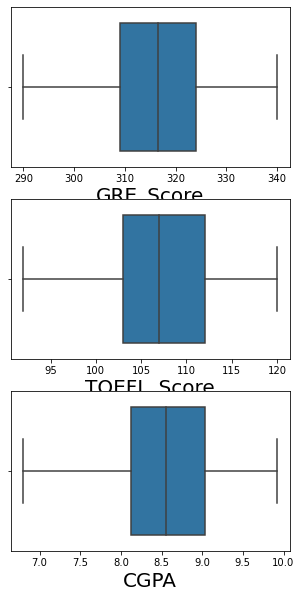

In [30]:
## Lets check outliers in any
box=data[['GRE_Score', 'TOEFL_Score','CGPA']]
plt.figure(figsize=(5,10), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
## There seems to be no outliers

In [31]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)

-0.05231732520434785 GRE_Score
0.1027880861342189 TOEFL_Score
-0.02653261314181717 CGPA


In [32]:
for column in box:
    print(stats.kurtosis(box[column]),column)

-0.6183261354443954 GRE_Score
-0.6224728502117052 TOEFL_Score
-0.5676573553864674 CGPA


In [ ]:
data.head()

In [ ]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply 
## Standard scaler.

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data[['GRE_Score', 'TOEFL_Score','CGPA']]= sc.fit_transform(data[['GRE_Score', 'TOEFL_Score','CGPA']])

In [34]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,2,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,3,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,5,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


## Feature Selection

In [ ]:
## Feature selection is done to get that specific features which are important to predict the 
## the target varaible.

## First remove the redundant colunms i.e serial no,customer id,ids
## In second step remove constant columns,the columns not providing information.
## i.e standard deviation=0

In [35]:
## Dropping columns that are not required
data.drop(['Serial No.'],axis=1,inplace=True)

In [36]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


In [37]:
##checking the constant feature
data.describe()
##there is no constant feature in the given dataset

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,5.000000e+02,5.000000e+02,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.00000
mean,4.350520e-15,9.419132e-16,3.118000,3.374000,3.48400,3.091971e-15,0.560000,0.72174
std,1.001002e+00,1.001002e+00,1.128993,0.991004,0.92545,1.001002e+00,0.496884,0.14114
min,-2.394225e+00,-2.512331e+00,1.000000,1.000000,1.00000,-2.940115e+00,0.000000,0.34000
25%,-6.814090e-01,-6.927310e-01,2.000000,2.500000,3.00000,-7.430227e-01,0.000000,0.63000
50%,5.124333e-15,-3.105811e-02,3.000000,3.500000,3.50000,-2.720919e-02,1.000000,0.72000
75%,6.708143e-01,7.960330e-01,4.000000,4.000000,4.00000,7.672196e-01,1.000000,0.82000
max,2.113186e+00,2.119379e+00,5.000000,5.000000,5.00000,2.223672e+00,1.000000,0.97000


In [ ]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(data.drop('Chance_of_Admit',axis=1).corr(),annot=True)

In [ ]:
## There seems to be relationship between GRE and TOFEL score,CGPA however the relationship is not that strong.So we will not drop 
## further any features

## Model Building

In [38]:
## Definig independent and dependent variables
X=data.iloc[:,0:-1]
y=data.Chance_of_Admit

In [ ]:
data.head()

In [ ]:
X=data.iloc[:,0:7] ## independent variables
y=data.Chance_of_Admit ## dependent or target variable.

In [ ]:
y

In [39]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [41]:
y_hat

array([0.91672616, 0.79942231, 0.56537979, 0.71862135, 0.8175083 ,
       0.86211708, 0.47703811, 0.68387279, 0.82887511, 0.80907627,
       0.71810694, 0.72660196, 0.64934137, 0.93415008, 0.82748891,
       0.51040402, 0.83525243, 0.59940765, 0.53462827, 0.57206316,
       0.66614056, 0.55142244, 0.72357103, 0.79269463, 0.77908602,
       0.60610011, 0.95192416, 0.84668915, 0.62499053, 0.74517829,
       0.55420619, 0.7304802 , 0.54296781, 0.86424788, 0.65376644,
       0.73670757, 0.55500483, 0.9287975 , 0.64603766, 0.71146422,
       0.969428  , 0.57490522, 0.69110891, 0.85847298, 0.93998053,
       0.57952146, 0.95980988, 0.83805971, 0.79556134, 0.92836647,
       0.8920795 , 0.59797278, 0.70562358, 0.52141272, 0.95384125,
       0.58675825, 0.958073  , 0.73934295, 0.66769138, 0.50076826,
       0.63491504, 0.68223864, 0.59945475, 0.58819371, 0.43823095,
       0.58443491, 0.86932829, 0.89844722, 0.65768374, 0.70561723,
       0.61866988, 0.78440334, 0.68827935, 0.55834194, 0.55571

In [42]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.8205681087702014

In [43]:
test_score=r2_score(y_test,y_hat)
test_score

0.8175156689543607

In [44]:
X_train.shape,X_test.shape

((375, 7), (125, 7))

In [45]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.82)*(375-1)/(375-7-1)
train_adjusted_r2

0.816566757493188

In [46]:
test_adjusted_r2= 1-(1-0.81)*(125-1)/(125-7-1)
test_adjusted_r2

0.7986324786324787

In [47]:
print('intercept:', LR.intercept_) ## c value

intercept: 0.6385880356223819


In [48]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [0.02223197 0.01962726 0.00216471 0.0013331  0.01665794 0.07279768
 0.02618398]
